## Simple Linear Regression

### Importing Needed Packages

In [10]:
!pip install pandas matplotlib numpy scikit-learn
import pandas as pd                # powerful library for data manipulation and analysis
import matplotlib.pyplot as plt    # a plotting library for creating visualizations in Python, graphs, chats and plots.
import numpy as np                 # a package for numerical computing in Python, essential for scientific computing.
from sklearn.model_selection import train_test_split   # machine learning library that provides simple and efficient tools for data mining and analysis.


%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable


#### Downloading Data

In [11]:
#To download the data, we will use !wget to download if from IBM Object Storage
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [12]:
import requests

def download(url, filename):
    response = requests.get(url)  # Sends an HTTP request to the given URL
    if response.status_code == 200:  # Checks if the request was successful
        with open(filename, "wb") as f:  # Opens a file in binary write mode
            f.write(response.content)  # Writes the response data to the file


#### Understanding the data 

FuelConsumption.csv:
We have downloaded a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. Dataset source

MODELYEAR e.g. 2014
MAKE e.g. Acura
MODEL e.g. ILX
VEHICLE CLASS e.g. SUV
ENGINE SIZE e.g. 4.7
CYLINDERS e.g 6
TRANSMISSION e.g. A6
FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

#### Reading the data in

In [13]:

# Define the path (URL) first
path = "https://example.com/FuelConsumption.csv"

# Download the file
download(path, "FuelConsumption.csv")

In [14]:
df = pd.read_csv("FuelConsumption.csv")     # This reads the CSV FuelConsumption.csv and stores it in a variable df(dataframe)_

# take a look at the dataset
df.head()                                    #5 rows

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Data Exploration

In [15]:
#summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [16]:
# we will select some features to explore more
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


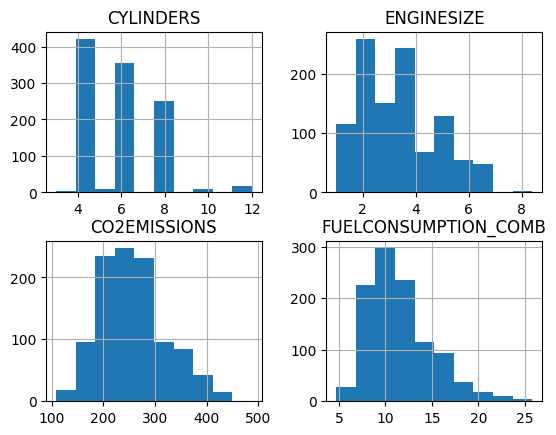

In [22]:
#Lets Plot each of these features
viz = cdf [['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]   # this code creates a histogram for 4 selected columns in the dataset
viz.hist()
plt.show()

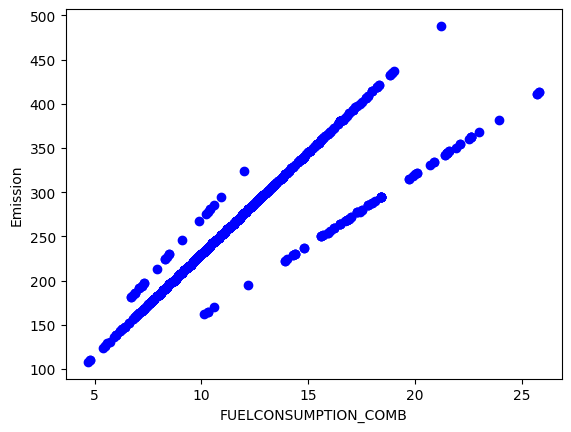

In [17]:
#Now,lets plot each of these features against the Emission, to see how linear their relationship is :
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue') # creates a scatter plot to visualize the relationship between fuel consump and CO2 emmisions:
plt.xlabel("FUELCONSUMPTION_COMB")       #Labels the x-axis as Fuel Consumption and the y-axis as Emission
plt.ylabel("Emission")
plt.show()                               # Displays the scatter plot

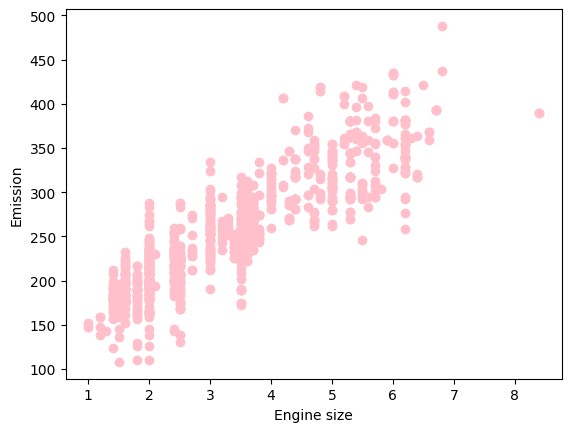

In [18]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='pink')   # This code creates a scatter plot to visualize the relationship between engine size and CO2
plt.xlabel("Engine size")           # Label the X-axis as Engine Size and y-axis as Emission
plt.ylabel("Emission")
plt.show()

### My Practice

#### Plot __CYLINDER__ vs the Emission, to see how linear is their relationship is:


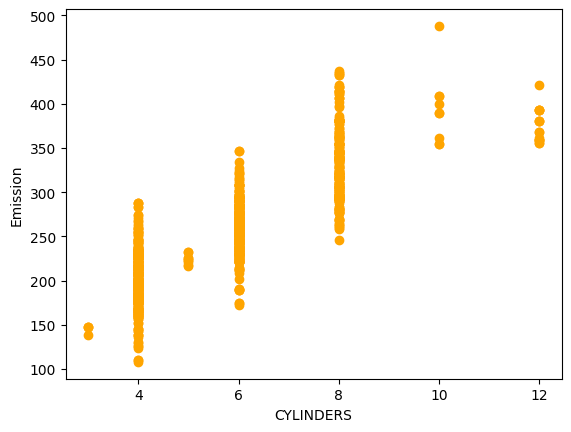

In [19]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'orange')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.show()

#### train and test dataset

Train/test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which you train with your training set and test with
your testing set. This will provide a more accurate evaluation on out-of-sample accuracy bc the testing dataset is not part of training model. 
Therefore, it gives us a better understanding of how well our model generalizes on new data. 


Lets's split our dataset info train and test set . 80% will be used for training, 20% for testing

In [22]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Simple Regression Model

##### TRAIN DATA DISTRIBUTION

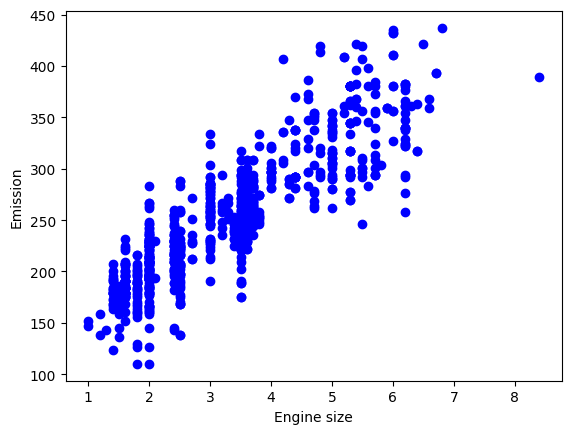

In [23]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

###### MODELING

In [ ]:
To model data means to create a mathematical representation of the relationship between the input features (variables) and the output based on the data

In [29]:
from sklearn import linear_model            
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)    #The slope of the line (how much CO2 emissions change for each unit increase in engine size)
print ('Intercept: ',regr.intercept_)   # The intercept is where the line crosses the y-axis (CO2 emission when engine size is 0)

Coefficients:  [[39.17870364]]
Intercept:  [124.54156374]


In [ ]:
m= 39,18 --------Coeficent is the slope of the line (also known as the weight). It means that for every 1 unit increase in engine size, the CO2 emission increase
by approximately 39.18 units.
Intercept , meaning that if the engine size were 0, the predicted CO2 emissions would be approx 124.54 units. It represents the baseline level of CO2 
emissions when there is no engine size.

##### In sumamary,the model predicts that as engine size increases, CO2 emissions rise by 39.18 units for each additional unit of engine size, starting from a base of 124.54 units

##### Plot outputs

Text(0, 0.5, 'Emission')

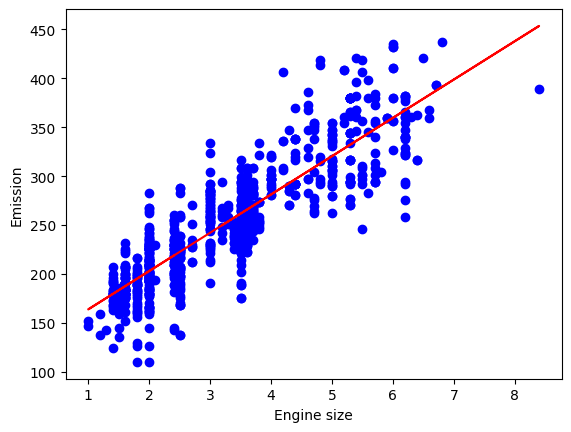

In [31]:
#We can plot the fit line over the data : this code is for visualizing the relationship between engine size and CO2 emissions, along with the fitted
# regression line
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')  # y = mx+b ,m = regr.coef_[0][0] (slope), b = regr.intercept_[0] (intercept).
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the 
development of a model, as it provides insight to areas that require improvement. 
There are different model evaluation metrics, lets use here to calculate the accuracy of our model based on the test set.
- Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since its just average error.
- Mean Squared Error( MSE ): Its the mean of the  squared error. Its more popular than Mean Absolute Error because the focus is geared more towords large 
errors. This is due to the squared term exponentially increasing larger erros in comparison to smaller ones. 
- Root Mean Squared Error (RMSE) is a common metric used to measure the accuracy of a model predictions in regression tasks.It gives an idea of how far off the predictions are from he actual values, in terms of the same units as the target variable.
- RMSE tells you how much, on average, the predicted values derivate from the actual values, while a higher RMSE means the predictions are less accurate

In [32]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])  # the input (test_x) and output(test_y) values from the test dataset, test_X contains the engine size, test_y contains the actual CO2 emissions
test_y = np.asanyarray(test[['CO2EMISSIONS']]) #test_y_ = regr.predict(test_x)- uses the trained regression model to predict the CO2 emissions based on the engine sizes in test_x
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 25.10
Residual sum of squares (MSE): 1092.84
R2-score: 0.76


In [ ]:
MAE- 25.10 - for each prediction the models estimated CO2 emission is, on average 25.10 units higher or lower than the actual value. 
MSE- 1092.84 This is a Mean Squared Error, its a measure how far the predictions are from the actual value. 
R2-score 0.76 means that 76% of the variability in the CO2 emissions is expained by the model using engine size as the predictor.

### Summary

In [ ]:
The model has some error (25.1 unit on average). but it explains 76% of the variability in CO2 emissions based on engine size. 
The MSE shows that some larger errors still exists, though the model performs reasonably well. 